[Introduct Anatomical T1 ]

In [5]:
#load the t1
import nibabel as nib
img = nib.load('/Users/plab/Documents/JupyerData/proj-5c50b6f12daf2e0032f880eb/sub-100206/dt-neuro-anat-t1w.tag-acpc_aligned.tag-brain_extracted.id-5c57072befbc2800526291bb/t1.nii.gz')

[now that we have it in memory what kinds of questions can we ask]

In [13]:
dataDimensions=img.shape
dataDimensions

(145, 174, 145)

[what does this mean] [What's in one of these entries]

In [8]:
data = img.get_fdata()
data[96,86,57]

851.6476440429688

[That's in one, whats in all?]

Total number of voxels
3658350
Minimum voxel value
-31.94868278503418
Maximum voxel value
1591.8572998046875
Number of voxel values less than or equal to zero
2685933
Number of voxel values greater than zero
972417


Text(0.5, 1.0, 'Distributon of voxel values above greater than zero')

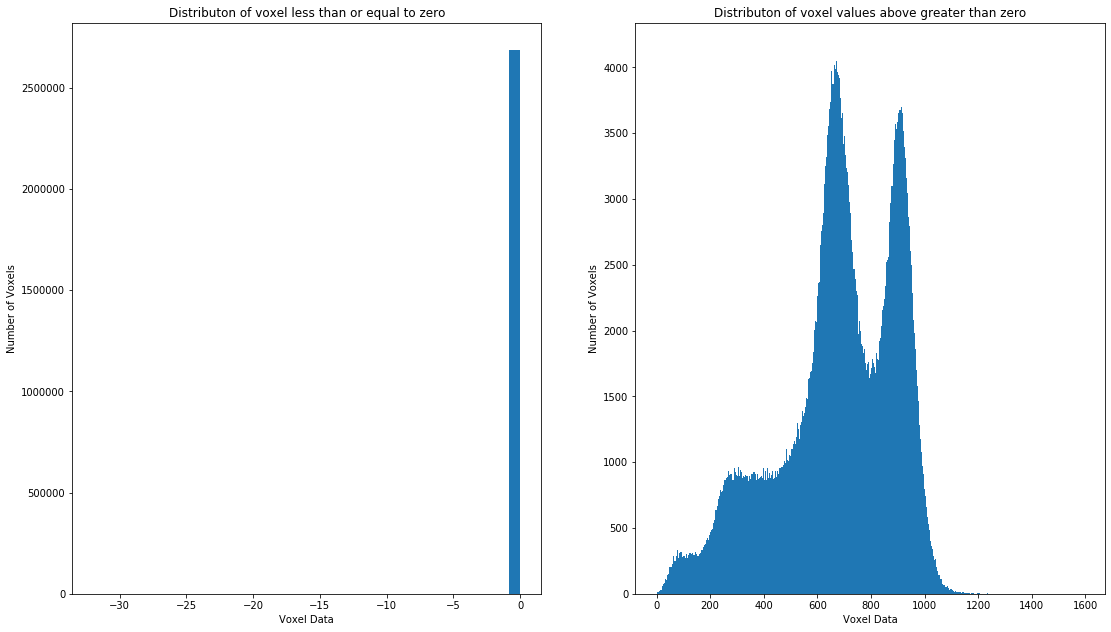

In [27]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
unwrappedData=np.ndarray.flatten(data)


print('Total number of voxels')
voxTotal=dataDimensions[0]*dataDimensions[1]*dataDimensions[2]
print(voxTotal)

print('Minimum voxel value')
print(np.min(unwrappedData))

print('Maximum voxel value')
print(np.max(unwrappedData))

splitPoint=0

def smallVal(n): 
    return n<=splitPoint
def largeVal(n):
    return n>splitPoint

result=map(smallVal,unwrappedData)
smallBool=list(result)

result=map(largeVal,unwrappedData)
largeBool=list(result)

print('Number of voxel values less than or equal to zero')
print(sum(smallBool))

print('Number of voxel values greater than zero')
print(sum(largeBool))

plt.subplot(1, 2, 1)
plt.hist(unwrappedData[smallBool], bins=40)
plt.xlabel('Voxel Data')
plt.ylabel('Number of Voxels')
plt.title('Distributon of voxel less than or equal to zero')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.subplot(1, 2, 2)
plt.hist(unwrappedData[largeBool], bins=1000)
plt.xlabel('Voxel Data')
plt.ylabel('Number of Voxels')
plt.title('Distributon of voxel values  greater than zero')

[discuss nifti t1 as a data entity]
[How does this work as a map of anatomy]  spatial representation

In [29]:
print(img.header.get_zooms())

(1.25, 1.25, 1.25)


Describe relevance of of this measure.  how does this data look when we arrange it spatially?

In [1]:
from niwidgets import NiftiWidget
from niwidgets import examplet1

T1Path='/Users/plab/Documents/JupyerData/proj-5c50b6f12daf2e0032f880eb/sub-100206/dt-neuro-anat-t1w.tag-acpc_aligned.tag-brain_extracted.id-5c57072befbc2800526291bb/t1.nii.gz'


test_widget = NiftiWidget(T1Path)
test_widget.nifti_plotter()




<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=72, continuous_update=False, description='x', max=144), IntSlider(value=…

Now for parcellations.  How do they work

In [38]:
import nibabel as nib
atlasPath='/Users/plab/Documents/JupyerData/proj-5c50b6f12daf2e0032f880eb/sub-100206/dt-neuro-parcellation-volume.id-5c50c3f7ecd2f200ccfe9fae/parc.nii.gz'
atlasImg = nib.load(atlasPath)

In [39]:
atlasDataDimensions=atlasImg.shape
print('Data dimensions')
print(atlasDataDimensions)

Data dimensions
(182, 217, 182)


In [40]:
atlasData = atlasImg.get_fdata()
print('Number of unique labels in ')
print(np.unique(atlasData))

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
unwrappedData=np.ndarray.flatten(data)


print('Total number of voxels')
voxTotal=dataDimensions[0]*dataDimensions[1]*dataDimensions[2]
print(voxTotal)

print('Minimum voxel value')
print(np.min(unwrappedData))

print('Maximum voxel value')
print(np.max(unwrappedData))

splitPoint=0

def smallVal(n): 
    return n<=splitPoint
def largeVal(n):
    return n>splitPoint

result=map(smallVal,unwrappedData)
smallBool=list(result)

result=map(largeVal,unwrappedData)
largeBool=list(result)

print('Number of voxel values less than or equal to zero')
print(sum(smallBool))

print('Number of voxel values greater than zero')
print(sum(largeBool))

plt.subplot(1, 2, 1)
plt.hist(unwrappedData[smallBool], bins=40)
plt.xlabel('Voxel Data')
plt.ylabel('Number of Voxels')
plt.title('Distributon of voxel less than or equal to zero')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.subplot(1, 2, 2)
plt.hist(unwrappedData[largeBool], bins=1000)
plt.xlabel('Voxel Data')
plt.ylabel('Number of Voxels')
plt.title('Distributon of voxel values  greater than zero')

In [30]:

atlasPath='/Users/plab/Documents/JupyerData/proj-5c50b6f12daf2e0032f880eb/sub-100206/dt-neuro-parcellation-volume.id-5c50c3f7ecd2f200ccfe9fae/parc.nii.gz'

atlas_widget = NiftiWidget(atlasPath)
atlas_widget.nifti_plotter()

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=90, continuous_update=False, description='x', max=181), IntSlider(value=…

[Discuss how this works]

As you explore the parcellation there are a number of things to take note of.  First and foremost we can note the means by which the parcellation actually parcellates the brain.  Note that the parcellation is, in essence, a volumetric mask which contains integer values corresponding to labels stored in a lookup table.  Each voxel is identified as corresponding to some component of an anatomical entity.  The anatomical entities that manifest in a parcellation vary depending on what standard is used, but typically they correspond to For example [PROVIDE EXAMPLE HERE].  




    Furthermore, because parcellations are performed on a specific subject's anatomy, the overlaying of one subject's parcellation on another subjects brain will result in an uninformative and innacruate characterization of the subject's brain.
    
DISPLAY MISMATCH HERE

    Next, we look at the tractogram in order to get a better sense of white matter's relation to tractography using the preceeding discussion as a basis for comparison.